In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
maindata = pd.read_csv("lipo_result_file_1.csv")
maindata.drop(["Directory","name","date","type"],axis = 1, inplace=True)

### Check Data

In [3]:
maindata

,Sample Name,TPTG [mg/dL],TPCH [mg/dL],LDCH [mg/dL],HDCH [mg/dL],TPA1 [mg/dL],TPA2 [mg/dL],TPAB [mg/dL],LDHD [-/-],ABA1 [-/-],...,H3PL [mg/dL],H4PL [mg/dL],H1A1 [mg/dL],H2A1 [mg/dL],H3A1 [mg/dL],H4A1 [mg/dL],H1A2 [mg/dL],H2A2 [mg/dL],H3A2 [mg/dL],H4A2 [mg/dL]
0,ATB_Plasma_Lipofit_03032023,79.08,241.99,161.65,67.62,163.90,39.93,97.06,2.39,0.59,...,16.47,36.29,15.67,17.38,27.55,103.43,1.48,3.23,6.95,28.66
1,MS_Plasma_Lipofit_03032023,277.08,214.51,109.77,53.12,151.51,37.45,103.81,2.07,0.69,...,14.31,35.86,9.11,15.08,21.59,101.89,0.98,2.45,6.29,30.10


In [4]:
maindata.isna().sum()

Sample Name     0
TPTG [mg/dL]    0
TPCH [mg/dL]    0
LDCH [mg/dL]    0
HDCH [mg/dL]    0
               ..
H4A1 [mg/dL]    0
H1A2 [mg/dL]    0
H2A2 [mg/dL]    0
H3A2 [mg/dL]    0
H4A2 [mg/dL]    0
Length: 113, dtype: int64

In [5]:
maindata.shape

(2, 113)

In [6]:
df = maindata.iloc[0]

In [7]:
df

Sample Name     ATB_Plasma_Lipofit_03032023
TPTG [mg/dL]                          79.08
TPCH [mg/dL]                         241.99
LDCH [mg/dL]                         161.65
HDCH [mg/dL]                          67.62
                           ...             
H4A1 [mg/dL]                         103.43
H1A2 [mg/dL]                           1.48
H2A2 [mg/dL]                           3.23
H3A2 [mg/dL]                           6.95
H4A2 [mg/dL]                          28.66
Name: 0, Length: 113, dtype: object

In [8]:
df.shape

(113,)

In [9]:
tests = pd.Series(df.index)

In [10]:
tests

0       Sample Name
1      TPTG [mg/dL]
2      TPCH [mg/dL]
3      LDCH [mg/dL]
4      HDCH [mg/dL]
           ...     
108    H4A1 [mg/dL]
109    H1A2 [mg/dL]
110    H2A2 [mg/dL]
111    H3A2 [mg/dL]
112    H4A2 [mg/dL]
Length: 113, dtype: object

### Regular Expressions

#### Subfractions

In [11]:
re_HDL_subf = r"H\d+"
re_LDL_subf = r"L\d+"
re_VLDL_subf =r"V\d+"

In [12]:
HDL_subf = tests[tests.str.contains(re_HDL_subf)]
LDL_subf = tests[tests.str.contains(re_LDL_subf)]
VLDL_subf = tests[tests.str.contains(re_VLDL_subf)]

In [42]:
re_HDL = r"^HD+"
re_IDL = r"^ID+"
re_LDL = r"^LD+"
re_VLDL =r"^VL+"

In [43]:
m_HDL = tests[tests.str.contains(re_HDL)]
m_IDL = tests[tests.str.contains(re_IDL)]
m_LDL = tests[tests.str.contains(re_LDL)]
m_VLDL = tests[tests.str.contains(re_VLDL)]

In [15]:
chol = r"[A-Za-z]\dCH"
freechol = r"[A-Za-z]\dFC"
phos = r"[A-Za-z]\dPL"
pnum = r"[A-Za-z]\dPN"
trig = r"[A-Za-z]\dTG"

#### HDL

In [16]:
apo = r"H1A\d"
HDL_APO = HDL_subf[HDL_subf.str.contains(apo)]

In [17]:
HDL_chol_subf = HDL_subf[HDL_subf.str.contains(chol)]
HDL_fchol_subf = HDL_subf[HDL_subf.str.contains(freechol)]
HDL_phos_subf = HDL_subf[HDL_subf.str.contains(phos)]
HDL_trig_subf = HDL_subf[HDL_subf.str.contains(trig)]

##### LDL

In [18]:
apo = r"L\dAB"
LDL_APO = LDL_subf[LDL_subf.str.contains(apo)]
LDL_APO

83    L1AB [mg/dL]
84    L2AB [mg/dL]
85    L3AB [mg/dL]
86    L4AB [mg/dL]
87    L5AB [mg/dL]
88    L6AB [mg/dL]
dtype: object

In [19]:
LDL_chol_subf = LDL_subf[LDL_subf.str.contains(chol)]
LDL_fchol_subf = LDL_subf[LDL_subf.str.contains(freechol)]
LDL_phos_subf = LDL_subf[LDL_subf.str.contains(phos)]
LDL_pnum_subf = LDL_subf[LDL_subf.str.contains(pnum)]
LDL_trig_subf = LDL_subf[LDL_subf.str.contains(trig)]

#### VLDL

In [20]:
VLDL_chol_subf = VLDL_subf[VLDL_subf.str.contains(chol)]
VLDL_fchol_subf = VLDL_subf[VLDL_subf.str.contains(freechol)]
VLDL_phos_subf = VLDL_subf[VLDL_subf.str.contains(phos)]
VLDL_trig_subf = VLDL_subf[VLDL_subf.str.contains(trig)]

#### Lipoproteins

In [21]:
re_HDLP = r"HD+"
re_LDLP = r"LD+"
re_IDLP = r"ID+"
re_VLDLP =r"VL+"

In [22]:
HDLP = tests[tests.str.contains(re_HDLP)]
LDLP = tests[tests.str.contains(re_LDLP)]
IDLP = tests[tests.str.contains(re_IDLP)]
VLDLP = tests[tests.str.contains(re_VLDLP)]

#### Lipoprotein Main Fractions

In [23]:
re_mainfrac = r"TP+"
LPMainF = tests[tests.str.contains(re_mainfrac)] 
LPMainF_list = LPMainF.tolist()
LPMainF_list.append("ABA1 [-/-]")
LPMainF_list.append("TBPN [nmol/L]")
LPMainF = pd.Series(LPMainF_list)

### LDL Subfractions

LDL_APO\
LDL_chol_subf\
LDL_fchol_subf\
LDL_phos_subf\
LDL_pnum_subf\
LDL_trig_subf\
\
for low density lipoprotein fractions.
Data is df 

##### Particle Number

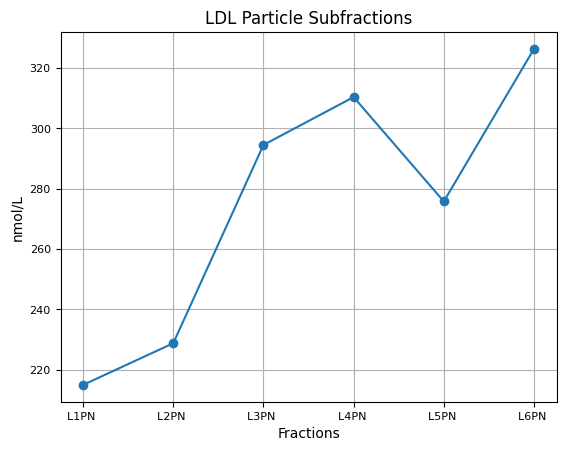

In [24]:
ldf = df[LDL_pnum_subf]

plt.plot(ldf.index.str.replace("[nmol/L]",""), ldf.values, marker='o', linestyle='-')

plt.title('LDL Particle Subfractions')
plt.xlabel('Fractions')
plt.ylabel('nmol/L')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Cholestrol

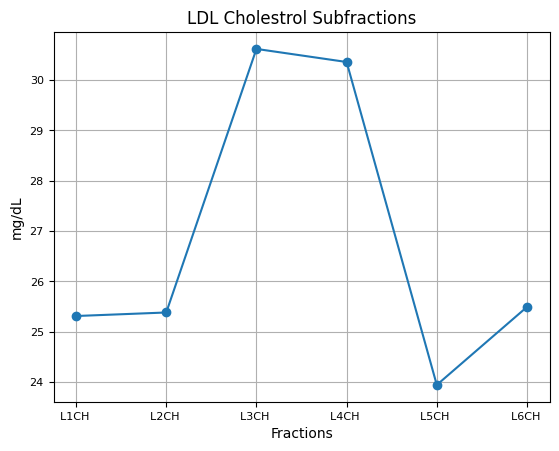

In [25]:
ldf = df[LDL_chol_subf]

plt.plot(ldf.index.str.replace("[mg/dL]",""), ldf.values, marker='o', linestyle='-')

plt.title('LDL Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Free Cholestrol

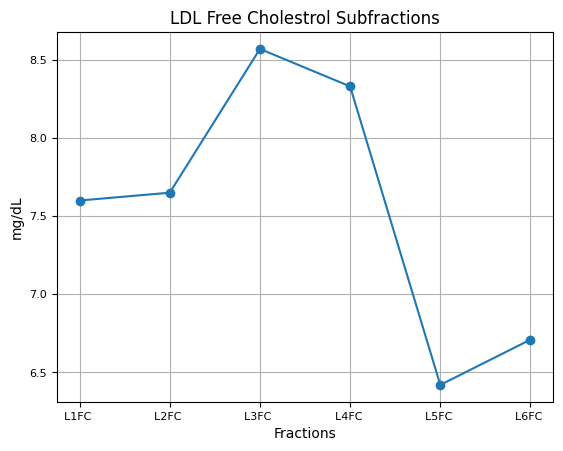

In [26]:
ldf = df[LDL_fchol_subf]

plt.plot(ldf.index.str.replace("[mg/dL]",""), ldf.values, marker='o', linestyle='-')

plt.title('LDL Free Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Phospolipid

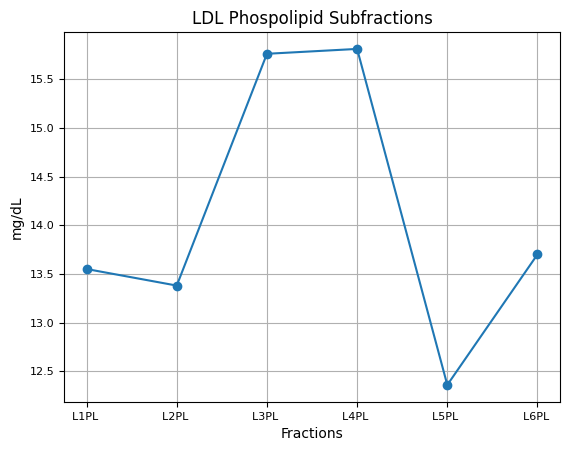

In [27]:
ldf = df[LDL_phos_subf]

plt.plot(ldf.index.str.replace("[mg/dL]",""), ldf.values, marker='o', linestyle='-')

plt.title('LDL Phospolipid Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Triglycerides

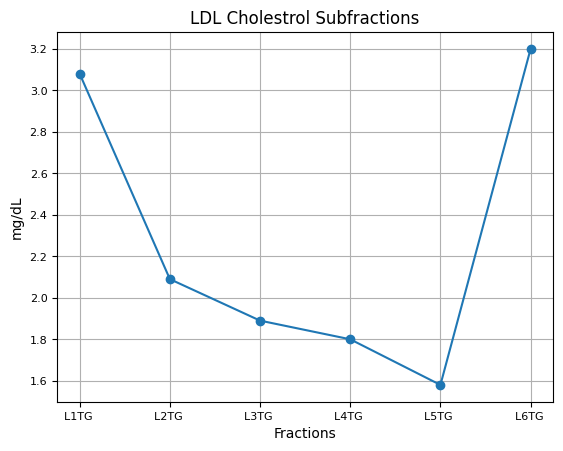

In [28]:
ldf = df[LDL_trig_subf]

plt.plot(ldf.index.str.replace("[mg/dL]",""), ldf.values, marker='o', linestyle='-')

plt.title('LDL Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

### HDL Subfractions

HDL_APO\
LDL_chol_subf\
LDL_fchol_subf\
LDL_phos_subf\
LDL_trig_subf\
\
for high density lipoprotein fractions.
Data is df 

##### Cholestrol

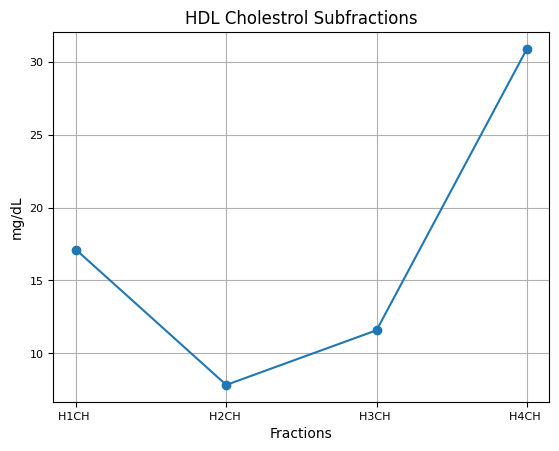

In [29]:
hdf = df[HDL_chol_subf]

plt.plot(hdf.index.str.replace("[mg/dL]",""), hdf.values, marker='o', linestyle='-')

plt.title('HDL Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Free Cholestrol

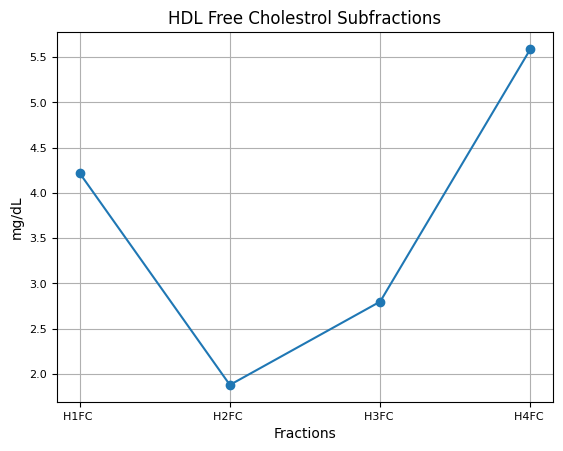

In [30]:
hdf = df[HDL_fchol_subf]

plt.plot(hdf.index.str.replace("[mg/dL]",""), hdf.values, marker='o', linestyle='-')

plt.title('HDL Free Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Phospolipid

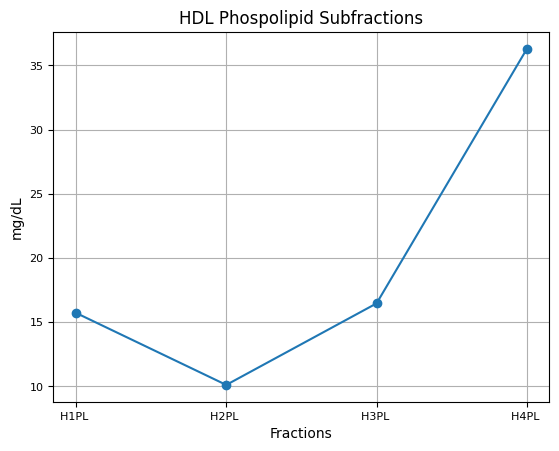

In [31]:
hdf = df[HDL_phos_subf]

plt.plot(hdf.index.str.replace("[mg/dL]",""), hdf.values, marker='o', linestyle='-')

plt.title('HDL Phospolipid Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Triglycerides

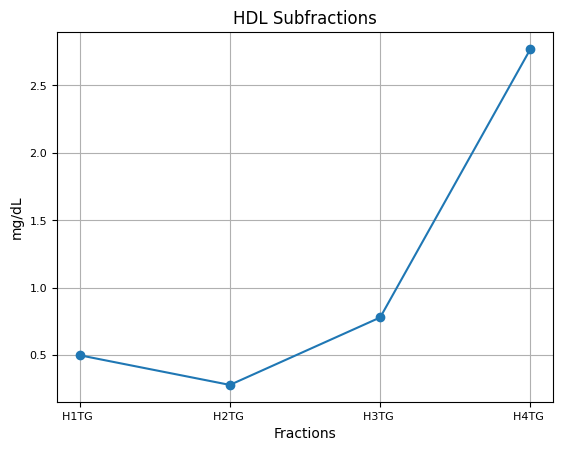

In [32]:
hdf = df[HDL_trig_subf]

plt.plot(hdf.index.str.replace("[mg/dL]",""), hdf.values, marker='o', linestyle='-')

plt.title('HDL Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

### VLDL Subfractions

LDL_chol_subf\
LDL_fchol_subf\
LDL_phos_subf\
LDL_trig_subf\
\
for very low density lipoprotein fractions.
Data is df 

##### Cholestrol

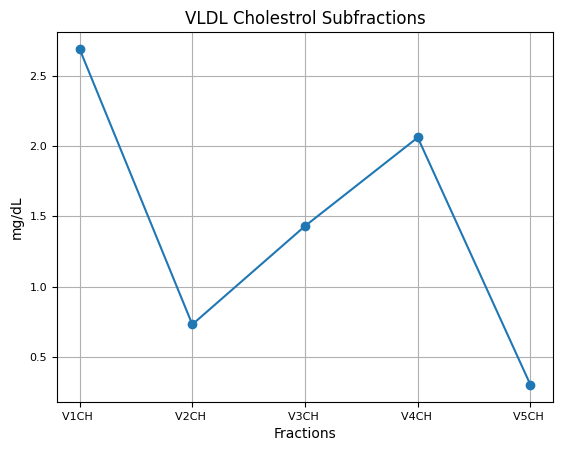

In [33]:
vdf = df[VLDL_chol_subf]

plt.plot(vdf.index.str.replace("[mg/dL]",""), vdf.values, marker='o', linestyle='-')

plt.title('VLDL Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Free Cholestrol

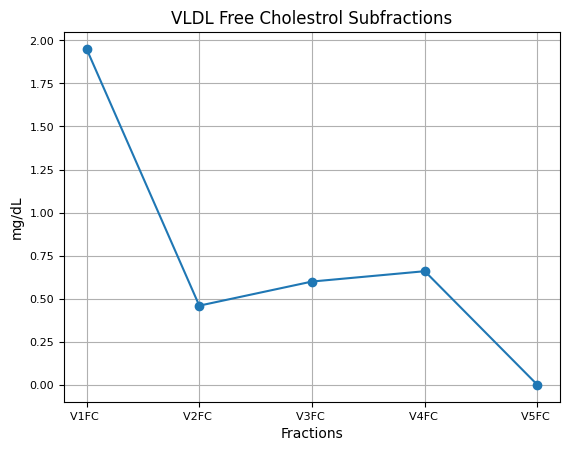

In [34]:
vdf = df[VLDL_fchol_subf]

plt.plot(vdf.index.str.replace("[mg/dL]",""), vdf.values, marker='o', linestyle='-')

plt.title('VLDL Free Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Phospolipid

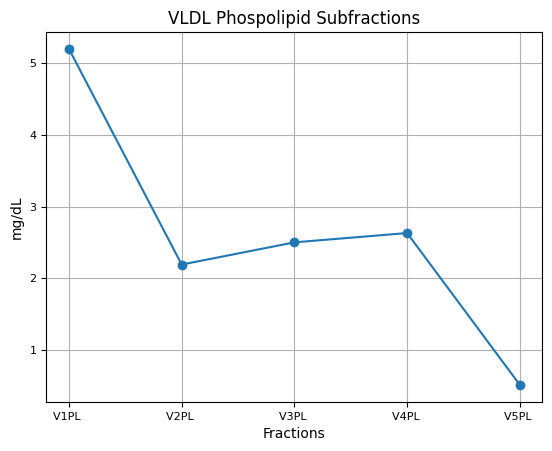

In [35]:
vdf = df[VLDL_phos_subf]

plt.plot(vdf.index.str.replace("[mg/dL]",""), vdf.values, marker='o', linestyle='-')

plt.title('VLDL Phospolipid Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

##### Triglycerides

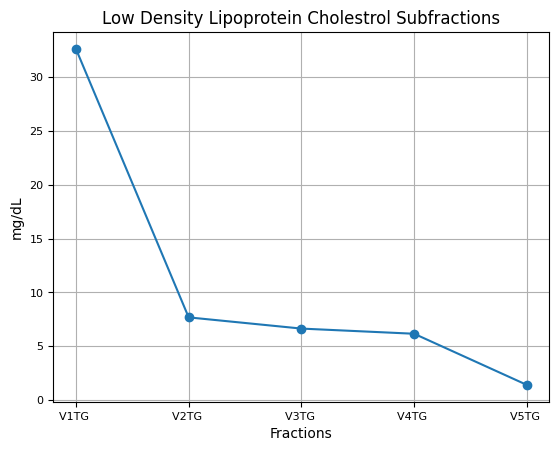

In [36]:
vdf = df[VLDL_trig_subf]

plt.plot(vdf.index.str.replace("[mg/dL]",""), vdf.values, marker='o', linestyle='-')

plt.title('Low Density Lipoprotein Cholestrol Subfractions')
plt.xlabel('Fractions')
plt.ylabel('mg/dL')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.show()

### Chart Tests

In [37]:
lp_df = df[LPMainF]
lp_df

TPTG [mg/dL]       79.08
TPCH [mg/dL]      241.99
TPA1 [mg/dL]       163.9
TPA2 [mg/dL]       39.93
TPAB [mg/dL]       97.06
ABA1 [-/-]          0.59
TBPN [nmol/L]    1764.78
Name: 0, dtype: object

In [44]:
hdl_df = df[m_HDL]
hdl_df

HDCH [mg/dL]     67.62
HDTG [mg/dL]      4.27
HDFC [mg/dL]     11.75
HDPL [mg/dL]     76.99
HDA1 [mg/dL]    163.36
HDA2 [mg/dL]      40.0
Name: 0, dtype: object

In [45]:
idl_df = df[m_IDL]
idl_df

IDPN [nmol/L]    73.62
IDTG [mg/dL]      7.28
IDCH [mg/dL]     11.08
IDFC [mg/dL]      3.15
IDPL [mg/dL]      7.26
IDAB [mg/dL]      4.05
Name: 0, dtype: object

In [46]:
ldl_df = df[m_LDL]
ldl_df

LDCH [mg/dL]      161.65
LDHD [-/-]          2.39
LDPN [nmol/L]    1623.31
LDTG [mg/dL]       13.49
LDFC [mg/dL]       44.09
LDPL [mg/dL]       85.15
LDAB [mg/dL]       89.28
Name: 0, dtype: object

In [47]:
vldl_df = df[m_VLDL]
vldl_df

VLPN [nmol/L]    80.26
VLTG [mg/dL]     61.57
VLCH [mg/dL]      9.09
VLFC [mg/dL]      5.42
VLPL [mg/dL]     14.82
VLAB [mg/dL]      4.41
Name: 0, dtype: object

Tests to be charted:

In [48]:
nc_tests = lp_df.index.to_list() + hdl_df.index.to_list() + idl_df.index.to_list() + ldl_df.index.to_list() + vldl_df.index.to_list()
tests = [test.replace(" [mg/dL]", "").replace(" [nmol/L]", "").replace(" [-/-]", "") for test in nc_tests]
tests

['TPTG',
 'TPCH',
 'TPA1',
 'TPA2',
 'TPAB',
 'ABA1',
 'TBPN',
 'HDCH',
 'HDTG',
 'HDFC',
 'HDPL',
 'HDA1',
 'HDA2',
 'IDPN',
 'IDTG',
 'IDCH',
 'IDFC',
 'IDPL',
 'IDAB',
 'LDCH',
 'LDHD',
 'LDPN',
 'LDTG',
 'LDFC',
 'LDPL',
 'LDAB',
 'VLPN',
 'VLTG',
 'VLCH',
 'VLFC',
 'VLPL',
 'VLAB']